In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Upload the survey data set and its affiliated schema.

In [15]:
df = pd.read_csv("survey_results_public.csv")
schema = pd.read_csv('survey_results_schema.csv')

### Examine the types of questions, see what you'd like to explore further.

In [16]:
question = [x for x in schema.QuestionText]
question

['Randomized respondent ID number (not in order of survey response time)',
 'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."',
 'Do you code as a hobby?',
 'How often do you contribute to open source?',
 'How do you feel about the quality of open source software (OSS)?',
 'Which of the following best describes your current employment status?',
 'In which country do you currently reside?',
 'Are you currently enrolled in a formal, degree-granting college or university program?',
 'Which of the following best describes the highest level of formal education that you’ve completed?',
 'What was your main or most important field of study?',
 'Which of the following types of non-degree education have you used or participated in? Please select all that apply.',
 'Approximately how many people are employed by the company or organization you work for?',
 'Which of the following describe you? Please select all that apply.',
 'Includ

### I'd like too see if there's any correlation between hours worked and years of experience per country.

In [17]:
# Make an easy index for reference.

question_index = pd.Series(df.columns)
question_index[0:60]

0                 Respondent
1                 MainBranch
2                   Hobbyist
3                OpenSourcer
4                 OpenSource
5                 Employment
6                    Country
7                    Student
8                    EdLevel
9             UndergradMajor
10                  EduOther
11                   OrgSize
12                   DevType
13                 YearsCode
14                Age1stCode
15              YearsCodePro
16                 CareerSat
17                    JobSat
18                  MgrIdiot
19                  MgrMoney
20                   MgrWant
21                   JobSeek
22              LastHireDate
23                   LastInt
24                  FizzBuzz
25                JobFactors
26              ResumeUpdate
27            CurrencySymbol
28              CurrencyDesc
29                 CompTotal
30                  CompFreq
31             ConvertedComp
32               WorkWeekHrs
33                  WorkPlan
34            

In [18]:
# New dataframe with the features I'm interested in.

hours_yoe_df = df.copy()
hours_yoe_df = hours_yoe_df.iloc[:,[6,15,32]]
hours_yoe_df.head()

,Country,YearsCodePro,WorkWeekHrs
0,United Kingdom,NaN,NaN
1,Bosnia and Herzegovina,NaN,NaN
2,Thailand,1,40.0
3,United States,Less than 1 year,80.0
4,Ukraine,9,55.0


In [19]:
# Dropping the NaNs is fine for this analysis.

nan= (hours_yoe_df.size - hours_yoe_df.dropna().size )/3

print(f"We lose about {nan} rows of users in this drop.  That leaves us {len(hours_yoe_df.dropna())} rows to analyze.")
print()
hours_yoe_df.dropna(inplace=True)
hours_yoe_df.head()

We lose about 24597.0 rows of users in this drop.  That leaves us 64286 rows to analyze.



,Country,YearsCodePro,WorkWeekHrs
2,Thailand,1,40.0
3,United States,Less than 1 year,80.0
4,Ukraine,9,55.0
5,Canada,3,15.0
6,Ukraine,4,32.0


In [20]:
# Groupby is always a great place to start.

hours_yoe_df.groupby('Country')['YearsCodePro'].max().reset_index()[:]

,Country,YearsCodePro
0,Afghanistan,Less than 1 year
1,Albania,Less than 1 year
2,Algeria,Less than 1 year
3,Andorra,31
4,Angola,1
5,Antigua and Barbuda,6
6,Argentina,Less than 1 year
7,Armenia,Less than 1 year
8,Australia,Less than 1 year
9,Austria,Less than 1 year


In [21]:
# Quick look at what dtypes we're dealing with:

hours_yoe_df.dtypes

Country          object
YearsCodePro     object
WorkWeekHrs     float64
dtype: object

In [22]:
# We should drop the countries whose max experience is less than 1 year, then convert to float.

hours_yoe_df = hours_yoe_df[hours_yoe_df["YearsCodePro"]!="Less than 1 year"]
hours_yoe_df['YearsCodePro'] = pd.to_numeric(hours_yoe_df['YearsCodePro'], errors='coerce')

In [23]:
print(f"Now down to {len(hours_yoe_df)} rows.")

Now down to 61168 rows.


In [24]:
### We want to make a series of backups.
backup = hours_yoe_df.copy()

#### Let's get a quick histogram for reference.

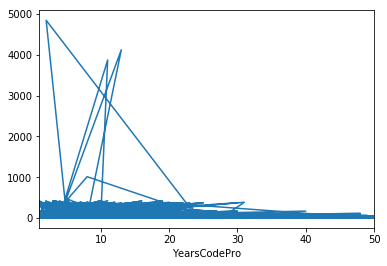

In [26]:
# Then plot that against WorkWeekHrs

hours_yoe_df.set_index('YearsCodePro')['WorkWeekHrs'].plot()

In [27]:
### That seems weird.  Are there weird values for hours?  

hours_yoe_df['WorkWeekHrs'].max()

4850.0

In [28]:
#  There are some weird work week hours.  Time for more data cleaning.

hours_yoe_df['WorkWeekHrs'].describe()

count    61168.000000
mean        42.243938
std         37.923889
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max       4850.000000
Name: WorkWeekHrs, dtype: float64

In [30]:
#  Let's look at the top 50 largest work week hours, to see what's needs dropped.

hours_yoe_df.sort_values('WorkWeekHrs', ascending=False).reset_index()[:50]

,index,Country,YearsCodePro,WorkWeekHrs
0,54987,India,2.0,4850.0
1,19355,Switzerland,13.0,4125.0
2,34282,Sweden,11.0,3875.0
3,5673,Sri Lanka,8.0,1012.0
4,2137,Turkey,5.0,475.0
5,31956,Austria,3.0,425.0
6,48640,Turkey,10.0,425.0
7,78721,Switzerland,3.0,425.0
8,50399,Brazil,11.0,425.0
9,20187,Turkey,10.0,425.0


In [31]:
# Wow, there's so many errors here, including people who report working 1 hour per week.
    #  Let's see how many people worked over 120 hours per week.

print(f"It looks like {len(hours_yoe_df[hours_yoe_df['WorkWeekHrs']>120])} people reported they worked over 120 hours.")
print()
print()
hours_yoe_df[hours_yoe_df["WorkWeekHrs"]>120]

It looks like 452 people reported they worked over 120 hours.




,Country,YearsCodePro,WorkWeekHrs
19,Lithuania,4.0,140.0
149,Romania,13.0,160.0
483,Poland,3.0,160.0
614,Norway,4.0,375.0
1121,Finland,4.0,375.0
1155,Czech Republic,6.0,130.0
1286,Greece,1.0,168.0
1420,Israel,18.0,168.0
1500,Romania,1.0,160.0
1690,Austria,2.0,385.0


In [32]:
hours_yoe_df.head()

,Country,YearsCodePro,WorkWeekHrs
2,Thailand,1.0,40.0
4,Ukraine,9.0,55.0
5,Canada,3.0,15.0
6,Ukraine,4.0,32.0
8,New Zealand,4.0,32.0


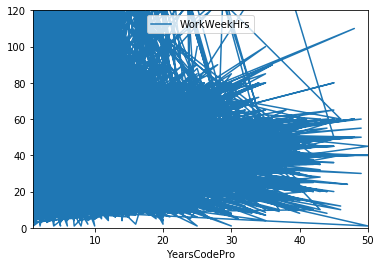

In [33]:
# There's way too many data points to plot this!

hours_yoe_df.set_index('YearsCodePro').plot(ylim=(0,120))

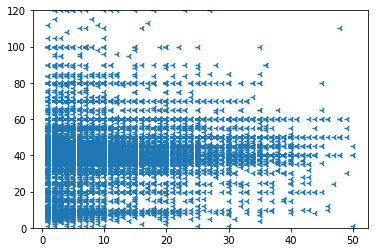

In [78]:
# What about a true scatter plot for this?  Will we be able to see any patterns?

plt.ylim(0,120)
plt.scatter(x=hours_yoe_df.YearsCodePro, y=hours_yoe_df.WorkWeekHrs, marker='3')

In [52]:
#### Not great.  Let's go straight to the individual countries.  Starting with the 5 biggest samples sizes.

x = hours_yoe_df.groupby('Country')['Country'].count().reset_index(name='count').sort_values(['count'], ascending=False).head()
x

In [53]:
# This was just a beautiful piece of code.  Did we follow that?  (Explain.)

In [71]:
# Make a new df with just the top 5 countries.

five_countries=hours_yoe_df.copy()
five_countries=five_countries[five_countries['Country'].isin(x['Country'])]
five_countries.sample(20)

,Country,YearsCodePro,WorkWeekHrs
20441,United States,4.0,35.0
18610,Canada,6.0,40.0
47416,India,2.0,9.0
47699,United States,30.0,40.0
63576,United States,6.0,40.0
76724,United States,4.0,40.0
49203,United Kingdom,15.0,80.0
14591,United Kingdom,1.0,40.0
29618,India,2.0,45.0
4245,Canada,7.0,42.0


In [73]:
len(hours_yoe_df)-len(five_countries)

29476

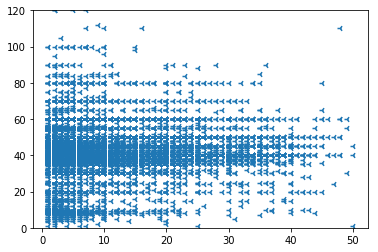

In [79]:
# It will be half the size.  Let's try our scatter plot again.

plt.ylim(0,120)
plt.scatter(x=five_countries.YearsCodePro, y=five_countries.WorkWeekHrs, marker='3')

In [ ]:
# We have much more data for the lower people.  We should bin this.  And further divide per country and per other criteria.

###  I want to know what productivity challenges are faced per ___